# Stoneburner, Kurt
- ## DSC 650 - Tensorflow Keras Binary Classifier Example

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [2]:
from os import environ

environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import tensorflow.keras

In [3]:
#//*** Download Data and Load arrays
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\stonk013\Anaconda3\envs\keras_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\stonk013\Anaconda3\envs\keras_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [4]:

#//*** Word_index is dictionary mapping words to an integer index
word_index = imdb.get_word_index()

#//*** Maps indexes to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

#//*** Decodes the Review
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]] )

You can’t feed lists of integers into a neural network. You have to turn your lists intotensors. There are two ways to do that:
 - Pad your lists so that they all have the same length, turn them into an integertensor  of  shape  (samples,word_indices),  and  then  use  as  the  first  layer  inyour network a layer capable of handling such integer tensors (the Embeddinglayer, which we’ll cover in detail later in the book).
 
 
 - **(Example Below: vectorize_sequences)** One-hot  encode  your  lists  to  turn  them  into  vectors  of  0s  and  1s.  This  would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vec-tor that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

In [5]:
#//*** Lists of integers must be converted into tensors.
def vectorize_sequences(sequences, dimension=10000):
    #//*** Builds zero filled matrix of shape dimension
    results = np.zeros((len(sequences), dimension))
    
    #//*** Assigns 1s to the specific integer for references.
    #//*** This is manual one-hot encoding
    for i, sequence in enumerate(sequences):
        
         for j in sequence:   
            results[i, j] = 1.
                
    return results
    
#//*** Download Data and Load arrays
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)    
    
#//*** Vectorize the Training and Test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#//*** Vectorize the Training and Test Labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Build the Network ##
The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup you’ll  ever  encounter.  A  type  of  network  that  performs  well  on  such  a  problem  is a simple  stack  of  fully  connected  (Dense)  layers  with  relu  activations:  *Dense(16,activation='relu')*.  

The argument  being  passed  to  each  Dense layer (16) is the number of hidden units of the layer. A hidden unit is a dimension in the representation space of the layer. Each such Dense layer with a relu activation implements the following chain of tensor operations: 

**output = relu(dot(W, input) + b)** 

Having 16 hidden units means the weight matrix W will have shape (input_dimension,16): the dot product with W will project the input data onto a 16-dimensional representation space (and then you’ll add the bias vector b and apply the relu operation). 

You can  intuitively understand the dimensionality of your representation space as  “how much freedom you’re allowing the network to have when learning internal representations.” *Having more hidden units (a  higher-dimensional representation  space) allows your network to learn more-complex representations, but it makes the network more  computationally  expensive and may lead to learning unwanted patterns (patterns that will improve performance on the training data but not on the test data).*

There are two key architecture decisions to be made about such a stack of Dense layers: 
- How many layers to use
- How many hidden units to choose for each layer

For the time being go with the following architecture choice: 
- Two intermediate layers with 16 hidden units each 
- A third layer that will output the scalar prediction regarding the sentiment ofthe current review

The intermediate layers will use *relu* as their activation function, and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be positive). A *relu* (rectified linear unit) is a function meant to zero out negative values, whereas a sigmoid “squashes” arbitrary values into the [0, 1] interval, outputting something that can be interpreted as a probability

In [6]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#//*** Compile the Model



model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#//*** Configure the Optimizer
#model.compile(
#    optimizer=optimizers.RMSprop(lr=0.001),
#    loss=losses.binary_crossentropy,
#    metrics=[metrics.binary_accuracy]
#)


#//*** Use Custom Losses and Metrics
from tensorflow.keras import losses
from tensorflow.keras import metrics

#//*** Set Aside a Validation Set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#//*** Train Model
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5176 - acc: 0.7755 - val_loss: 0.4462 - val_acc: 0.7928
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3044 - acc: 0.9021 - val_loss: 0.3056 - val_acc: 0.8882
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2242 - acc: 0.9257 - val_loss: 0.2771 - val_acc: 0.8926
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1767 - acc: 0.9417 - val_loss: 0.2825 - val_acc: 0.8852
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1452 - acc: 0.9531 - val_loss: 0.2785 - val_acc: 0.8908
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1202 - acc: 0.9635 - val_loss: 0.2968 - val_acc: 0.8861
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1008 - acc: 0.9705 - val_loss: 0.3074 - val_acc: 0.8827
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0836 - a

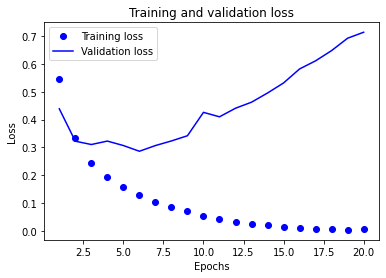

In [12]:
#//*** Plotting the training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


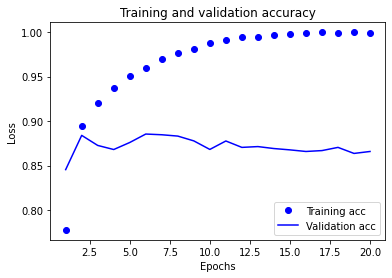

In [13]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
#//*** retraining a model from scratch
#//*** Previous Results didn't go well. Book suggests Overfitting, But it doesn't look like the 
#//*** Accuracy and Validation values worked well. 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
49/49 [==============================] - 3s 15ms/step - loss: 0.4363 - accuracy: 0.8263
Epoch 2/20
49/49 [==============================] - 1s 10ms/step - loss: 0.2505 - accuracy: 0.9109
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1930 - accuracy: 0.9325
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1635 - accuracy: 0.9431
Epoch 5/20
49/49 [==============================] - 0s 9ms/step - loss: 0.1384 - accuracy: 0.9535
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1228 - accuracy: 0.9582 0s - loss: 0.1166 - ac
Epoch 7/20
49/49 [==============================] - 0s 9ms/step - loss: 0.1100 - accuracy: 0.9635
Epoch 8/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0953 - accuracy: 0.9691
Epoch 9/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0816 - accuracy: 0.9749
Epoch 10/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0747 - accuracy

[0.7695156931877136, 0.8503599762916565]

In [17]:
def build_binary_output_model(**kwargs):
    #//*** Define the Model
    from tensorflow.keras import models
    from tensorflow.keras import layers
    from tensorflow.keras import optimizers
    
    
    #//*****************************
    #//*** Set Default values
    #//*****************************
    total_layers = 2
    hidden_units = 16
    first_activation = "relu"
    final_activation='sigmoid'
    optimizer='rmsprop'  
    loss = 'mse'
    metrics=['accuracy']
    shape = (0,0)
    do_compile = True
    
    #//*** Apply Kwargs
    for key,value in kwargs.items():
        
        if key == 'layers':
            total_layers=value

        if key == 'hidden_units':
            hidden_units=value
        
        if key == 'loss':
            loss=value
        
        if key == 'first_activation':
            first_activation=value
    
        if key == 'final_activation':
            final_activation=value
    
        if key == 'optimizer':
            optimizer=value
    
        if key == 'metrics':
            metrics=value
            
        if key == 'shape':
            shape = value

        if key == 'compile':
            do_compile = value

    model = models.Sequential()
    
    
    #//*** Add First Layer
    model.add(layers.Dense(hidden_units, activation=first_activation, input_shape=shape ))
    
    
    #//*** Add Additional Layers if total_layers greater than 2
    for x in range(total_layers-2):
        
        #//*** These are basic layers with same number of hidden units and using first_activation
        model.add(layers.Dense(hidden_units, activation=first_activation))
    
    
    
    #//*** Add Final Layer
    model.add(layers.Dense(1, activation=final_activation))
    
    #//*** Compile Model
    if do_compile:
        
        model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
    
    return model



In [19]:
#//****************************
#//*** Book Supplied Settings
#//****************************
model_shape = (10000,)
layers = 3
hidden_units = 16
first_activation = "relu"
final_activation = "sigmoid"
optimizer = "rmsprop"
loss = 'binary_crossentropy'
model = build_binary_output_model(
    shape=model_shape,
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy']  
)

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
49/49 [==============================] - 2s 23ms/step - loss: 0.4584 - accuracy: 0.8221
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2575 - accuracy: 0.9127
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.2012 - accuracy: 0.9289
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1671 - accuracy: 0.9422
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1470 - accuracy: 0.9476
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1283 - accuracy: 0.9560
Epoch 7/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1127 - accuracy: 0.9611
Epoch 8/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1001 - accuracy: 0.9661
Epoch 9/20
49/49 [==============================] - 0s 10ms/step - loss: 0.0855 - accuracy: 0.9720
Epoch 10/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0766 - accuracy: 0.9756
Epoch 11/2

[0.8005822896957397, 0.8503599762916565]

### Further experiments ### 
The following experiments will help convince you that the architecture choices you’ve made are all fairly reasonable, although there’s still room for improvement:
 - You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.
 - Try using layers with more hidden units or fewer hidden units: 32 units, 64 units,and so on.
 - Try using the mse loss function instead of binary_crossentropy.
 - Try using the tanh activation (an activation that was popular in the early days ofneural networks) instead of relu.

In [20]:
#//****************************
#//*** Suggestion use One Hidden Layer
#//****************************
model_shape = (10000,)
layers = 2
hidden_units = 16
first_activation = "relu"
final_activation = "sigmoid"
optimizer = "rmsprop"
loss = 'binary_crossentropy'
model = build_binary_output_model(
    shape=model_shape,
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy']  
)

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4495 - accuracy: 0.8324
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2785 - accuracy: 0.9081
Epoch 3/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2204 - accuracy: 0.9239
Epoch 4/20
49/49 [==============================] - 0s 9ms/step - loss: 0.1874 - accuracy: 0.9370
Epoch 5/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1650 - accuracy: 0.9436
Epoch 6/20
49/49 [==============================] - 0s 9ms/step - loss: 0.1493 - accuracy: 0.9503
Epoch 7/20
49/49 [==============================] - 1s 10ms/step - loss: 0.1349 - accuracy: 0.9552
Epoch 8/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1243 - accuracy: 0.9589
Epoch 9/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1146 - accuracy: 0.9626
Epoch 10/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1049 - accuracy: 0.9666
Epoch 11/20


[0.5385316610336304, 0.8536800146102905]

In [21]:
#//****************************************
#//*** Suggestion: use Three Hidden Layers
#//****************************************
model_shape = (10000,)
layers = 4
hidden_units = 16
first_activation = "relu"
final_activation = "sigmoid"
optimizer = "rmsprop"
loss = 'binary_crossentropy'
model = build_binary_output_model(
    shape=model_shape,
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy']  
)

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
49/49 [==============================] - 5s 12ms/step - loss: 0.4572 - accuracy: 0.8080
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2557 - accuracy: 0.9085
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.1973 - accuracy: 0.9289
Epoch 4/20
49/49 [==============================] - 0s 8ms/step - loss: 0.1648 - accuracy: 0.9420
Epoch 5/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1415 - accuracy: 0.9494
Epoch 6/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1246 - accuracy: 0.9551
Epoch 7/20
49/49 [==============================] - 0s 10ms/step - loss: 0.1048 - accuracy: 0.9638
Epoch 8/20
49/49 [==============================] - 0s 9ms/step - loss: 0.0933 - accuracy: 0.9686
Epoch 9/20
49/49 [==============================] - 1s 10ms/step - loss: 0.0817 - accuracy: 0.9736 0s - loss: 0.0794 - accuracy: 0.
Epoch 10/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0671

[0.8851346969604492, 0.8499600291252136]

In [22]:
#//****************************************
#//*** Suggestion: use 32 Hidden Units
#//****************************************
model_shape = (10000,)
layers = 3
hidden_units = 32
first_activation = "relu"
final_activation = "sigmoid"
optimizer = "rmsprop"
loss = 'binary_crossentropy'
model = build_binary_output_model(
    shape=model_shape,
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy']  
)

model.fit(x_train, y_train, epochs=20, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
49/49 [==============================] - 1s 13ms/step - loss: 0.4266 - accuracy: 0.8257
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2386 - accuracy: 0.9136
Epoch 3/20
49/49 [==============================] - 1s 14ms/step - loss: 0.1878 - accuracy: 0.9325
Epoch 4/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1589 - accuracy: 0.9416
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.1383 - accuracy: 0.9494
Epoch 6/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1209 - accuracy: 0.9580
Epoch 7/20
49/49 [==============================] - 1s 12ms/step - loss: 0.1022 - accuracy: 0.9631
Epoch 8/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0927 - accuracy: 0.9674
Epoch 9/20
49/49 [==============================] - 1s 16ms/step - loss: 0.0812 - accuracy: 0.9720 0s - loss: 0.0737 - accuracy
Epoch 10/20
49/49 [==============================] - 1s 14ms/step - loss: 0.0681

[0.9207907319068909, 0.8514400124549866]

In [23]:
#//****************************************
#//*** Suggestion: use 64 Hidden Units
#//****************************************
model_shape = (10000,)
layers = 3
hidden_units = 64
first_activation = "relu"
final_activation = "sigmoid"
optimizer = "rmsprop"
loss = 'binary_crossentropy'
model = build_binary_output_model(
    shape=model_shape,
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy']  
)

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/5
49/49 [==============================] - 1s 16ms/step - loss: 0.4240 - accuracy: 0.8107
Epoch 2/5
49/49 [==============================] - 1s 18ms/step - loss: 0.2395 - accuracy: 0.9076
Epoch 3/5
49/49 [==============================] - 1s 16ms/step - loss: 0.1847 - accuracy: 0.9298
Epoch 4/5
49/49 [==============================] - 1s 20ms/step - loss: 0.1458 - accuracy: 0.9434
Epoch 5/5
782/782 [==============================] - 31s 40ms/step - loss: 0.3607 - accuracy: 0.8748


[0.36067381501197815, 0.8748000264167786]

In [24]:
#//****************************************
#//*** Suggestion: use tanh activation
#//****************************************
model_shape = (10000,)
layers = 3
hidden_units = 16
first_activation = "tanh"
final_activation = "sigmoid"
optimizer = "rmsprop"
loss = 'binary_crossentropy'
model = build_binary_output_model(
    shape=model_shape,
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy']  
)

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/5
49/49 [==============================] - 4s 11ms/step - loss: 0.4162 - accuracy: 0.8337
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.2328 - accuracy: 0.9142
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1780 - accuracy: 0.9352
Epoch 4/5
49/49 [==============================] - 0s 9ms/step - loss: 0.1474 - accuracy: 0.9478
Epoch 5/5
782/782 [==============================] - 29s 37ms/step - loss: 0.3728 - accuracy: 0.8677


[0.3727782070636749, 0.867680013179779]

In [25]:
#//****************************************
#//*** Suggestion: use MSE loss
#//****************************************
model_shape = (10000,)
layers = 3
hidden_units = 16
first_activation = "relu"
final_activation = "sigmoid"
optimizer = "rmsprop"
loss = 'mse'
model = build_binary_output_model(
    shape=model_shape,
    layers=layers, 
    hidden_units = hidden_units,
    first_activation = first_activation,
    final_activation=final_activation, 
    optimizer=optimizer,
    loss=loss,metrics=['accuracy']  
)

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.1479 - accuracy: 0.8266
Epoch 2/5
49/49 [==============================] - 0s 9ms/step - loss: 0.0767 - accuracy: 0.9126
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 0.0587 - accuracy: 0.9320
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0476 - accuracy: 0.9447
Epoch 5/5
782/782 [==============================] - 29s 37ms/step - loss: 0.0892 - accuracy: 0.8794


[0.0892355889081955, 0.8794400095939636]